# Import modules

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from shimmingtoolbox.simulate import *

# Initialize class object

In [2]:
b0_sim = NumericalModel(model="shepp-logan")

# Generate background B<sub>0</sub> field

In [3]:
# Generate a backgroung B0
b0_field = -4  # (Hz)
b0_slope = 0.1 # (Hz/pixel)
b0_sim.generate_deltaB0("linear", [b0_slope, b0_field])

Text(0.5, 1.0, 'B0 field (T)')

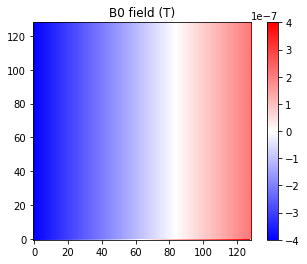

In [4]:
im = plt.imshow(b0_sim.deltaB0, origin='lower')
plt.set_cmap('bwr')
norm = colors.TwoSlopeNorm(vmin=-4e-7, vcenter=0.0, vmax=4e-7)
plt.pcolor(b0_sim.deltaB0, vmin=-4e-7, vmax=4e-7, norm=norm)
plt.colorbar()
plt.title("B0 field (T)")

Note: Although we generate the field using Hz values, the B0 field is stored in Tesla units, as is displayed in the image above.

# Simulate a measurement dataset

In [5]:
# Simulate the signal data
FA = 15 # (degrees)
TE = [0.003, 0.015] # (seconds)
SNR = 20
b0_sim.simulate_measurement(FA, TE, SNR)

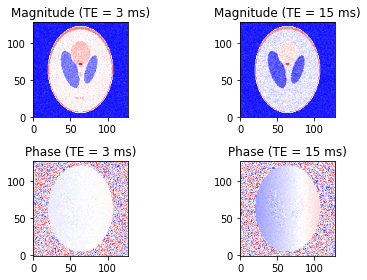

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(b0_sim.get_magnitude()[:,:,0,0], origin='lower')
axs[0, 0].set_title('Magnitude (TE = 3 ms)')
axs[0, 1].imshow(b0_sim.get_magnitude()[:,:,0,1], origin='lower')
axs[0, 1].set_title('Magnitude (TE = 15 ms)')
axs[1, 0].imshow(b0_sim.get_phase()[:,:,0,0], origin='lower')
axs[1, 0].set_title('Phase (TE = 3 ms)')
axs[1, 1].imshow(b0_sim.get_phase()[:,:,0,1], origin='lower')
axs[1, 1].set_title('Phase (TE = 15 ms)')
fig.tight_layout()

# Export the dataset to NIfTI

In [7]:
# Save simulation as NIfTI file (JSON sidecar also exported with parameters)
b0_sim.save('Phase', 'b0_mapping_data.nii', format='nifti')